### Aim: Perform RNN-GRU on NIFTY-50 Dataset (cipla.csv)

In [3]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Dense, Dropout
from keras.layers import GRU
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [4]:
df= pd.read_csv('/kaggle/input/cipla-data/CIPLA.csv') #Read the data

In [5]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,CIPLA,EQ,1349.40,1410.0,1457.35,1380.05,1457.35,1457.35,1441.36,21060,3.035496e+12,NaN,NaN,NaN
1,2000-01-04,CIPLA,EQ,1457.35,1537.0,1537.00,1430.00,1466.05,1465.25,1460.43,30215,4.412698e+12,NaN,NaN,NaN
2,2000-01-05,CIPLA,EQ,1465.25,1474.0,1474.00,1365.00,1441.00,1435.05,1428.11,33799,4.826872e+12,NaN,NaN,NaN
3,2000-01-06,CIPLA,EQ,1435.05,1434.0,1435.00,1349.00,1365.00,1355.85,1390.55,33083,4.600356e+12,NaN,NaN,NaN
4,2000-01-07,CIPLA,EQ,1355.85,1370.0,1389.90,1247.40,1247.40,1247.55,1267.49,66536,8.433351e+12,NaN,NaN,NaN


In [6]:
df.size

79590

In [7]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.792000e+03,4792.000000
mean,540.503798,541.457755,549.587693,532.143583,540.472588,540.421052,540.931589,1.550071e+06,7.841696e+13,44967.250407,7.408486e+05,0.509209
std,289.319810,289.955959,295.087710,283.868905,289.158087,289.151156,289.411215,2.317962e+06,1.620908e+14,43776.047324,7.339493e+05,0.154639
min,160.100000,150.550000,169.450000,145.000000,152.000000,160.100000,158.140000,5.050000e+02,5.400606e+10,613.000000,2.013000e+03,0.069300
25%,309.025000,309.962500,312.750000,305.350000,309.000000,309.025000,309.290000,3.790408e+05,1.447839e+13,21724.000000,2.831312e+05,0.404575
50%,473.850000,474.625000,479.950000,468.875000,473.525000,473.850000,475.215000,1.047786e+06,3.725861e+13,32967.000000,5.787145e+05,0.516650
75%,681.937500,683.225000,691.787500,671.675000,681.937500,681.937500,682.035000,1.815542e+06,7.848478e+13,50869.500000,9.761000e+05,0.615125
max,1465.250000,1537.000000,1537.000000,1430.000000,1466.050000,1465.250000,1460.430000,5.689556e+07,4.498902e+15,603361.000000,1.081558e+07,0.994500


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

### Exploratory Data Analysis (EDA)

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df=df.dropna()

In [11]:
df=df.set_index('Date')
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2011-06-01,CIPLA,EQ,326.05,326.05,328.5,324.25,325.70,327.25,326.39,644602,2.103933e+13,13861.0,316448.0,0.4909
2011-06-02,CIPLA,EQ,327.25,324.00,333.5,324.00,325.60,325.20,329.04,1433409,4.716429e+13,24573.0,747283.0,0.5213
2011-06-03,CIPLA,EQ,325.20,328.00,328.8,323.35,325.85,324.60,325.81,492898,1.605897e+13,8755.0,215837.0,0.4379
2011-06-06,CIPLA,EQ,324.60,325.95,332.5,324.00,332.00,331.70,329.90,1655179,5.460432e+13,18585.0,982798.0,0.5938
2011-06-07,CIPLA,EQ,331.70,331.50,339.0,331.00,337.85,337.60,337.44,2421958,8.172751e+13,25889.0,1544387.0,0.6377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,CIPLA,EQ,935.60,935.60,940.0,902.15,907.95,905.40,914.11,10255697,9.374885e+14,161321.0,3451318.0,0.3365
2021-04-27,CIPLA,EQ,905.40,913.00,919.5,901.00,911.20,912.40,909.22,5669049,5.154420e+14,120188.0,1126288.0,0.1987
2021-04-28,CIPLA,EQ,912.40,914.35,918.0,902.95,906.25,910.20,909.94,7251009,6.597970e+14,134413.0,1772739.0,0.2445


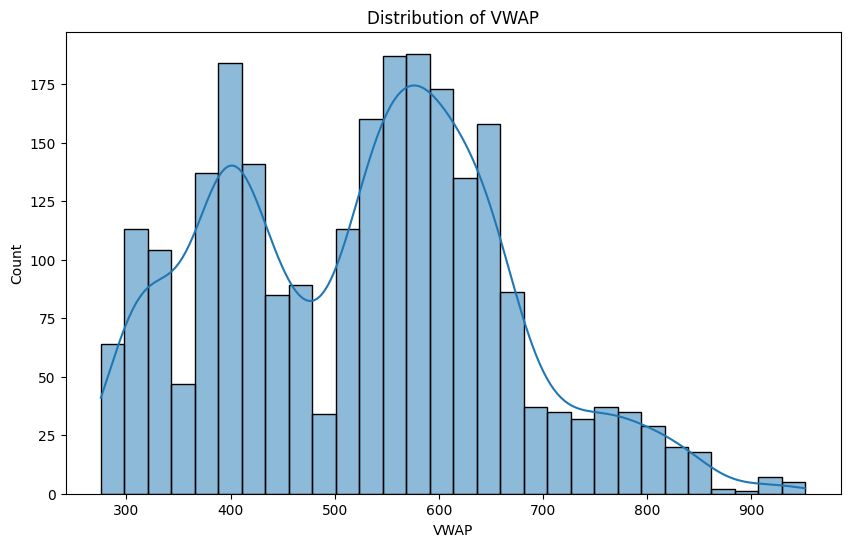

In [15]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['VWAP'], bins=30, kde=True)
plt.title('Distribution of VWAP')
plt.show()

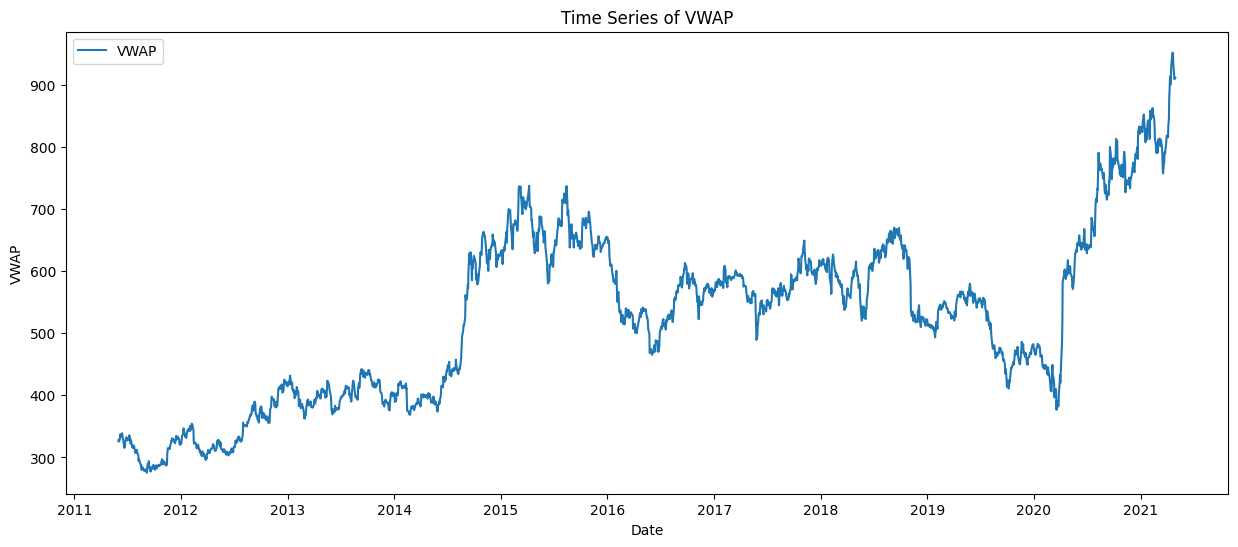

In [16]:
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['VWAP'], label='VWAP')
plt.title('Time Series of VWAP')
plt.xlabel('Date')
plt.ylabel('VWAP')
plt.legend()
plt.show()

<Figure size 1500x800 with 0 Axes>

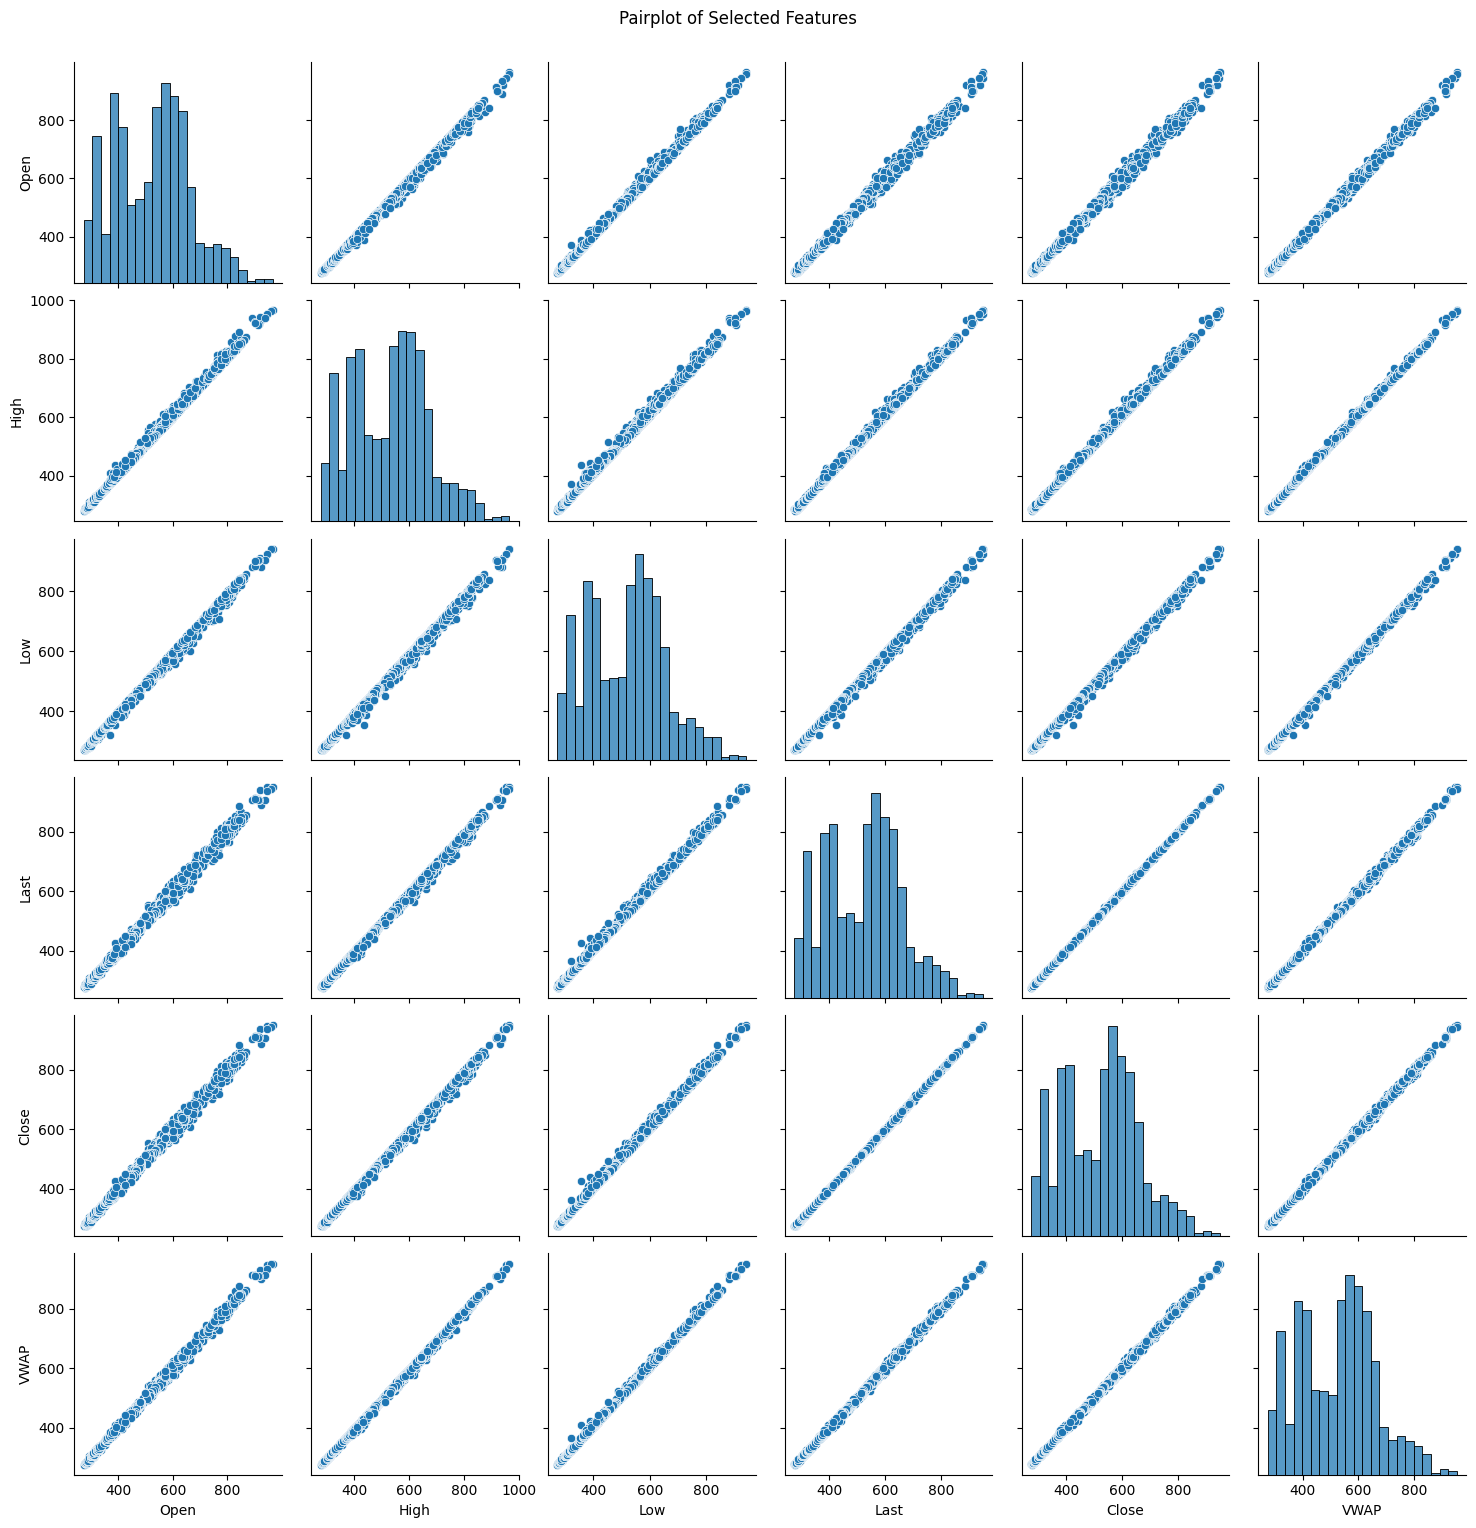

In [17]:
plt.figure(figsize=(15, 8))
sns.pairplot(df[['Open', 'High', 'Low', 'Last', 'Close', 'VWAP']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

In [19]:
df = pd.read_csv('/kaggle/input/cipla-data/CIPLA.csv', usecols = ['Date', 'VWAP'])
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,VWAP
0,2000-01-03,1441.36
1,2000-01-04,1460.43
2,2000-01-05,1428.11
3,2000-01-06,1390.55
4,2000-01-07,1267.49
...,...,...
5301,2021-04-26,914.11
5302,2021-04-27,909.22
5303,2021-04-28,909.94
5304,2021-04-29,910.22


<Axes: >

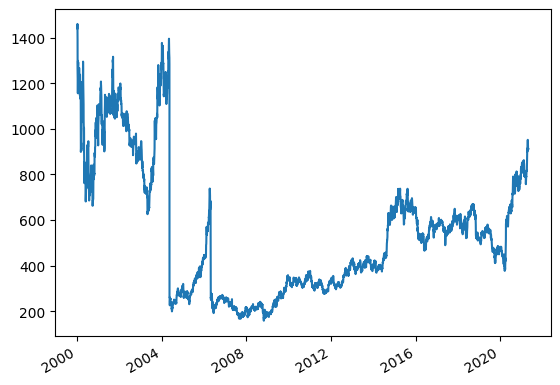

In [20]:
df.set_index("Date",  inplace=True)
df.VWAP.plot(xlabel = '')

In [21]:
# 3. Data Preprocessing
df['VWAP_MA2']=df.expanding(min_periods=3).mean()

In [22]:
df['EMA'] = df.iloc[:,0].ewm(span=3,adjust=False).mean() #ewm is used exponential moving average

In [23]:
df = df[df['VWAP_MA2'].notna()] #Remove the rows that have NAs

In [24]:
df.head()

,VWAP,VWAP_MA2,EMA
Date,,,
2000-01-05,1428.11,1443.300000,1439.502500
2000-01-06,1390.55,1430.112500,1415.026250
2000-01-07,1267.49,1397.588000,1341.258125
2000-01-10,1222.23,1368.361667,1281.744062
2000-01-11,1156.31,1338.068571,1219.027031


In [25]:
target=df[['VWAP']]
del df['VWAP']

In [26]:
x, y = df.values, target.values

In [27]:
x.shape

(5304, 2)

In [28]:
y.shape

(5304, 1)

In [29]:
x_scaled_set = MinMaxScaler() #Use MinMaxScaler function from sklearn.preprocessing library
y_scaled_set = MinMaxScaler()

X = x_scaled_set.fit_transform(x) #Fit to data and transform the data array x
Y = y_scaled_set.fit_transform(y.reshape(-1,1))

In [30]:
x.shape

(5304, 2)

In [31]:
X_train_data=X[0:4000,]
y_train_data=Y[0:4000,]
X_test_data=X[4000:5303,]
y_test_data=Y[4000:5303,]

In [32]:
X_train_data.shape

(4000, 2)

In [33]:
y_test_data.shape

(1303, 1)

In [34]:
X_train_data = X_train_data.reshape((-1,1,2)) #Reshape train dataset to required format
X_test_data = X_test_data.reshape((-1,1,2)) #Reshape test dataset to required format

In [35]:
GRU_model = Sequential() #Use Sequential function from keras.model library
GRU_model.add(GRU(units=512,
              return_sequences=True,
              input_shape=(1, 2))) #Add GRU model with 512 units. Note that return sequences should be true to pass on the sequences. Ensure that input_shape is inline with the inout data.
GRU_model.add(Dropout(0.2)) #Add a dropout layer to avoid overfitting.
GRU_model.add(GRU(units=256)) #Add another GRU layer with 256 units.
GRU_model.add(Dropout(0.2)) #Add another dropout layer to avoid overfitting.
GRU_model.add(Dense(1, activation='sigmoid')) #Finally, add a dense layer for getting a fully connected layer.


In [36]:
GRU_model.compile(loss='mse', optimizer='adam') #mse is mean square error which is the loss function and Adam optimizer will be the ooptimizer.

In [37]:
GRU_model.fit(X_train_data,y_train_data,batch_size=250, epochs=100, validation_split=0.15, verbose=1)


Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 0.1085 - val_loss: 0.0092
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0374 - val_loss: 8.3784e-04
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0026 - val_loss: 0.0215
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0027 - val_loss: 0.0119
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0014 - val_loss: 0.0030
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0010 - val_loss: 0.0026
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 9.8823e-04 - val_loss: 0.0024
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 9.1628e-04 - val_loss: 0.0014
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 8.2172e-04 - val_loss: 8.4578e-04
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 7.9656e-04 - val_loss: 8.0696e-04
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 7.3659e-04 - val_loss: 5.3316e-04
Epoch 12/100
14/

In [38]:
score = GRU_model.evaluate(X_test_data, y_test_data) #Evaluate model can be used to get the loss metric.
print('Score: {}'.format(score))
y_pred = GRU_model.predict(X_test_data) #Apply the built model on test data.
y_test_pred = y_scaled_set.inverse_transform(y_pred) #Use inverse transform to undo the scaling that was done before. This gives us the original values.
y_test_actual = y_scaled_set.inverse_transform(y_test_data) # Apply the inverse transform on the actual dataset for easy comparison of predicted vs actual.
#plt.plot(y_test_pred[-100:], label='Predicted') #Plot the predicted vs actual graph
#plt.plot(y_test_actual[-100:], label='Actual')
#plt.legend()
#plt.show()

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9994e-04
Score: 0.001167917507700622
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


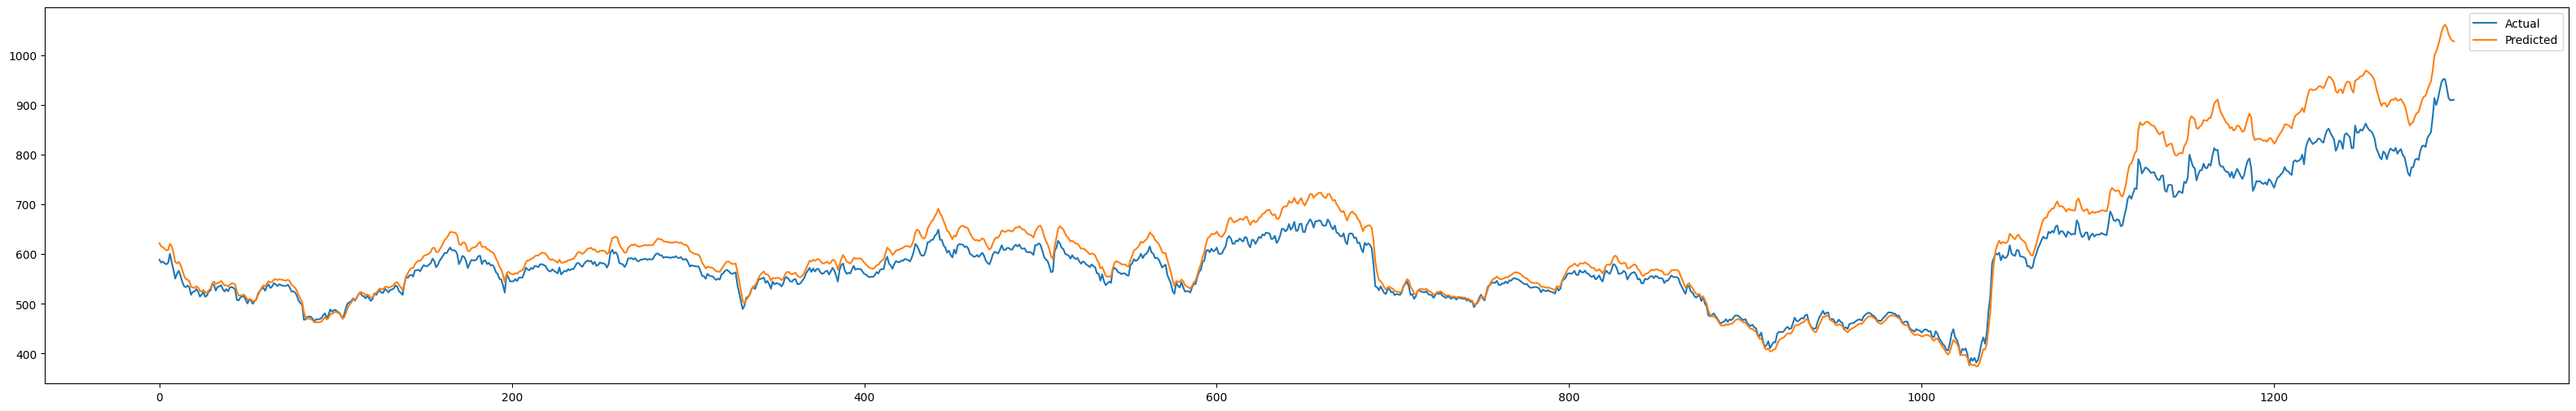

In [39]:

# Define the figure size
fig_size = (40, 6)  # Adjust width and height as needed

# Create a new figure with the specified size
plt.figure(figsize=fig_size)

# Assuming test_Dates, y_test_actual, and y_test_pred are already defined

# Plot actual and predicted data
plt.plot(y_test_actual, label='Actual')
plt.plot( y_test_pred, label='Predicted')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [40]:
# conlcusion: learnt to implement GRU on Nifty 50 stock market dataset